In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
# 다중 회귀분석
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn import model_selection
from sklearn.decomposition import PCA

In [4]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [8]:
data = pd.read_csv('../file/data_ver2.csv')
data = data.drop(columns='Unnamed: 0')

In [9]:
target = data[['sealevel']]
feature = data.drop(columns='sealevel')

In [10]:
target.head()
feature.head()

,Year,Hole Area,Minimum Ozone,co2,Population,Thickness,북극 해빙면적 평균(10^6km),남극 해빙면적 평균(10^6km)
0,1990,19.2,124.2,22849.92,5.28,2.035898,9.668333,8.662500
1,1991,18.8,119.0,23056.40,5.37,2.025763,9.742500,8.674167
2,1992,22.3,114.3,22988.29,5.45,2.024229,10.099167,8.525000
3,1993,24.2,112.6,23124.00,5.54,1.934320,9.810000,8.611667
4,1994,23.6,92.3,23260.29,5.62,1.974827,9.989167,9.030000


In [18]:
train_input,test_input,train_target,test_target = \
    train_test_split(feature,target)

poly = PolynomialFeatures()
train_poly = poly.fit_transform(train_input)
print(train_poly.shape)
test_poly = poly.transform(test_input)
print(test_poly.shape)
lr = LinearRegression()
lr.fit(train_poly,train_target)
print("train score :",lr.score(train_poly,train_target))
print("train score :",lr.score(test_poly,test_target))

(21, 45)
(7, 45)
train score : 1.0
train score : -0.6387695776240385


In [19]:
ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

ridge = Ridge()

ridge.fit(train_scaled,train_target)
print("train score :",ridge.score(train_scaled,train_target))
print("test score :",ridge.score(test_scaled,test_target))
model_selection.cross_val_score()

train score : 0.9882468714749181
test score : 0.8797172992114302


In [23]:
test_scaled.shape

(7, 45)

In [24]:
train_scaled.shape

(21, 45)

In [25]:
feature.shape

(28, 8)

In [26]:
data.shape

(28, 9)

In [43]:
km = KMeans(n_clusters=2)
km.fit(data)   # fit(data, label)

KMeans(n_clusters=2)

In [44]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [45]:
np.unique(km.labels_, return_counts=True) 

(array([0, 1], dtype=int32), array([14, 14]))

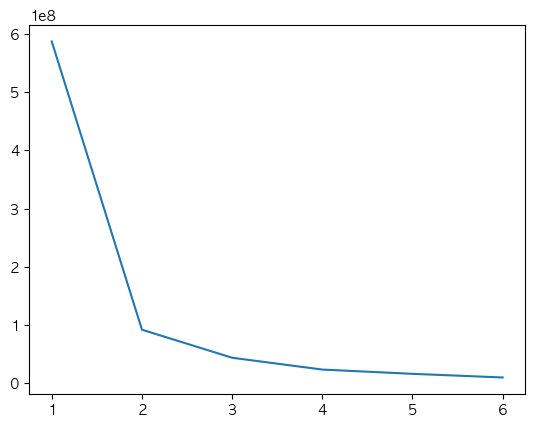

In [46]:
inertia = []
for k in range(1, 7):
    km = KMeans(n_clusters=k)
    km.fit(data)
    inertia.append(km.inertia_)

plt.plot(range(1, 7), inertia)
plt.show()

In [48]:
lr = LinearRegression()

In [65]:
data2 = data.copy()

In [72]:
# 필요한 열만 선택
X = data2[['Hole Area', 'Minimum Ozone', 'co2', ' Population', 'Thickness', '북극 해빙면적 평균(10^6km)', '남극 해빙면적 평균(10^6km)']]

# K-means 클러스터링 수행
kmeans = KMeans(n_clusters=2)
da = kmeans.fit_predict(X)


In [73]:
da

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [70]:
data2

,Year,sealevel,Hole Area,Minimum Ozone,co2,Population,Thickness,북극 해빙면적 평균(10^6km),남극 해빙면적 평균(10^6km),Cluster
0,1990,-22.847396,19.2,124.2,22849.92,5.28,2.035898,9.668333,8.662500,1
1,1991,-22.814062,18.8,119.0,23056.40,5.37,2.025763,9.742500,8.674167,1
2,1992,-20.247396,22.3,114.3,22988.29,5.45,2.024229,10.099167,8.525000,1
3,1993,-22.780729,24.2,112.6,23124.00,5.54,1.934320,9.810000,8.611667,1
4,1994,-17.980729,23.6,92.3,23260.29,5.62,1.974827,9.989167,9.030000,1
5,1996,-11.947396,22.8,108.8,24214.92,5.79,1.896918,9.799167,8.819167,1
6,1997,-2.647396,22.1,108.8,25292.92,5.87,1.935293,9.616667,8.657500,1
7,1998,-10.814063,25.9,98.8,24895.32,5.95,1.830868,9.626667,8.814167,1
8,1999,-0.247396,23.3,102.9,24957.30,6.03,1.770938,9.693333,8.829167,1
9,2000,2.952604,24.8,98.7,25637.87,6.11,1.750909,9.457500,8.995000,1


In [98]:
data.corr()

,Year,sealevel,Hole Area,Minimum Ozone,co2,Population,Thickness,북극 해빙면적 평균(10^6km),남극 해빙면적 평균(10^6km)
Year,1.000000,0.986431,-0.072629,0.358755,0.984559,0.999935,-0.963088,-0.862561,0.188518
sealevel,0.986431,1.000000,-0.109872,0.390406,0.976665,0.986437,-0.952230,-0.840105,0.239248
Hole Area,-0.072629,-0.109872,1.000000,-0.865891,-0.088726,-0.072830,0.109422,0.101324,0.162971
Minimum Ozone,0.358755,0.390406,-0.865891,1.000000,0.376802,0.358689,-0.378251,-0.337224,0.008884
co2,0.984559,0.976665,-0.088726,0.376802,1.000000,0.983657,-0.962415,-0.881419,0.205937
Population,0.999935,0.986437,-0.072830,0.358689,0.983657,1.000000,-0.961607,-0.859808,0.185538
Thickness,-0.963088,-0.952230,0.109422,-0.378251,-0.962415,-0.961607,1.000000,0.868445,-0.188103
북극 해빙면적 평균(10^6km),-0.862561,-0.840105,0.101324,-0.337224,-0.881419,-0.859808,0.868445,1.000000,0.014463
남극 해빙면적 평균(10^6km),0.188518,0.239248,0.162971,0.008884,0.205937,0.185538,-0.188103,0.014463,1.000000


In [81]:
seal = np.array(data['sealevel'])
nambing = np.array(data['남극 해빙면적 평균(10^6km)'])

In [87]:
seal = seal.reshape(-1,1)

In [88]:
seal.shape

(28, 1)

In [89]:
nambing = nambing.reshape(-1,1)

In [90]:
nambing.shape

(28, 1)

In [91]:
t = LinearRegression()
t.fit(nambing,seal)

LinearRegression()

In [141]:
t.predict([[8.2]])

array([[4.76302279]])

In [94]:
print(t.coef_,t.intercept_)

[[16.47631532]] [-130.34276281]


In [95]:
16.47631532 * 8.2 -130.34276281

4.7630228139999815

In [119]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(train_scaled)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [120]:
principalDf

,principal component1,principal component2
0,-6.167503,5.441584
1,7.887364,2.606162
2,3.943643,1.074088
3,-6.534240,1.503159
4,-6.152718,4.951674
5,0.791072,4.079809
6,7.308429,7.290722
7,-5.418122,-0.220742
8,-4.434238,0.082479
9,-2.440182,-2.979231


In [122]:
sum(pca.explained_variance_ratio_)

0.8204089424945508

In [124]:
data.corr()

,Year,sealevel,Hole Area,Minimum Ozone,co2,Population,Thickness,북극 해빙면적 평균(10^6km),남극 해빙면적 평균(10^6km)
Year,1.000000,0.986431,-0.072629,0.358755,0.984559,0.999935,-0.963088,-0.862561,0.188518
sealevel,0.986431,1.000000,-0.109872,0.390406,0.976665,0.986437,-0.952230,-0.840105,0.239248
Hole Area,-0.072629,-0.109872,1.000000,-0.865891,-0.088726,-0.072830,0.109422,0.101324,0.162971
Minimum Ozone,0.358755,0.390406,-0.865891,1.000000,0.376802,0.358689,-0.378251,-0.337224,0.008884
co2,0.984559,0.976665,-0.088726,0.376802,1.000000,0.983657,-0.962415,-0.881419,0.205937
Population,0.999935,0.986437,-0.072830,0.358689,0.983657,1.000000,-0.961607,-0.859808,0.185538
Thickness,-0.963088,-0.952230,0.109422,-0.378251,-0.962415,-0.961607,1.000000,0.868445,-0.188103
북극 해빙면적 평균(10^6km),-0.862561,-0.840105,0.101324,-0.337224,-0.881419,-0.859808,0.868445,1.000000,0.014463
남극 해빙면적 평균(10^6km),0.188518,0.239248,0.162971,0.008884,0.205937,0.185538,-0.188103,0.014463,1.000000


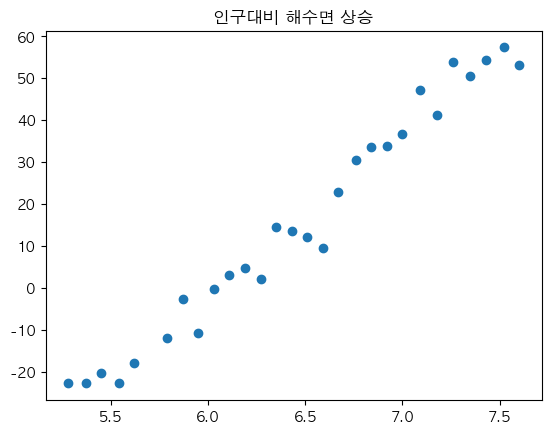

In [125]:

plt.scatter(data[' Population'],data['sealevel'])
plt.title('인구대비 해수면 상승')
plt.show()

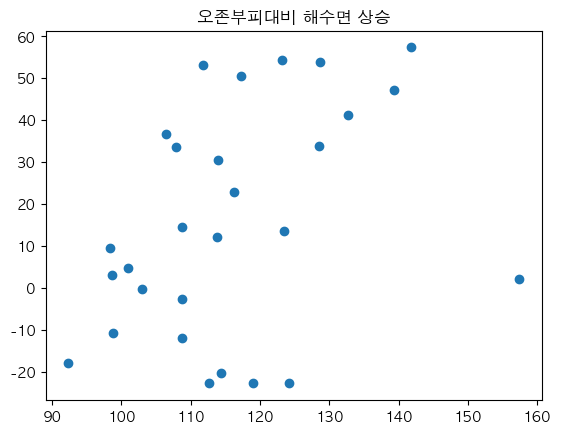

In [127]:
plt.scatter(data['Minimum Ozone'],data['sealevel'])
plt.title('오존부피대비 해수면 상승')
plt.show()

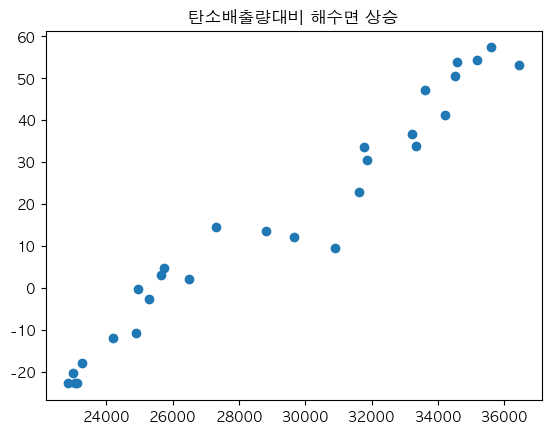

In [129]:
plt.scatter(data['co2'],data['sealevel'])
plt.title('탄소배출량대비 해수면 상승')
plt.show()

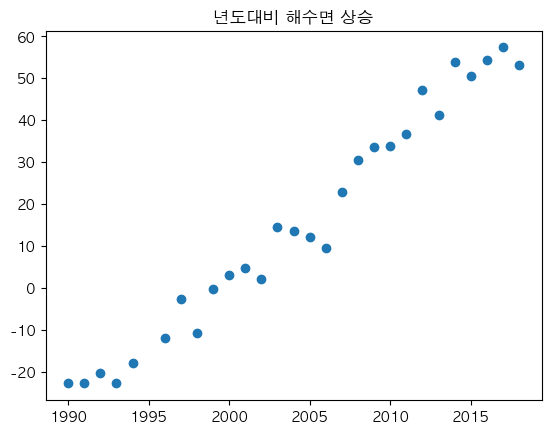

In [131]:
plt.scatter(data['Year'],data['sealevel'])
plt.title('년도대비 해수면 상승')
plt.show()

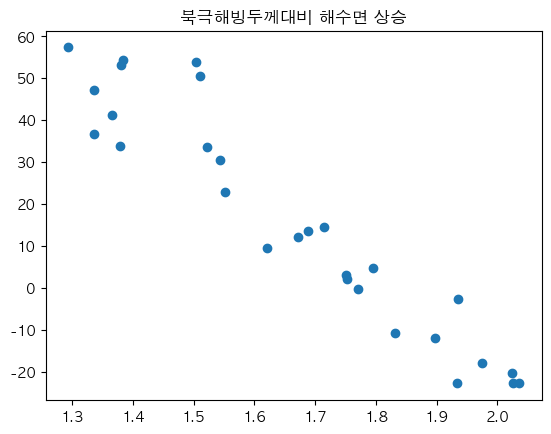

In [133]:
plt.scatter(data['Thickness'],data['sealevel'])
plt.title('북극해빙두께대비 해수면 상승')
plt.show()

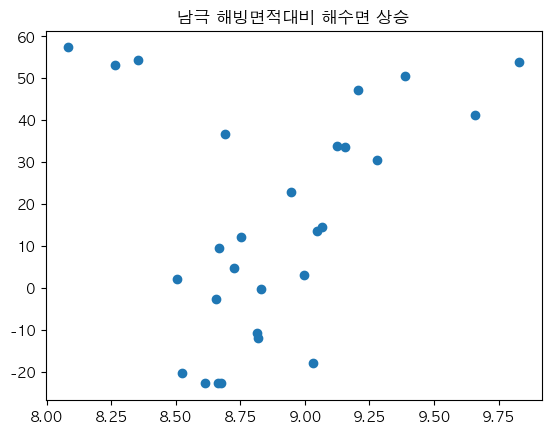

In [135]:
plt.scatter(data['남극 해빙면적 평균(10^6km)'],data['sealevel'])
plt.title('남극 해빙면적대비 해수면 상승')
plt.show()

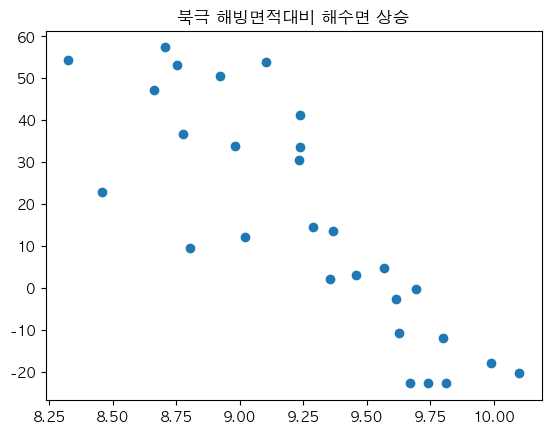

In [137]:
plt.scatter(data['북극 해빙면적 평균(10^6km)'],data['sealevel'])
plt.title('북극 해빙면적대비 해수면 상승')
plt.show()

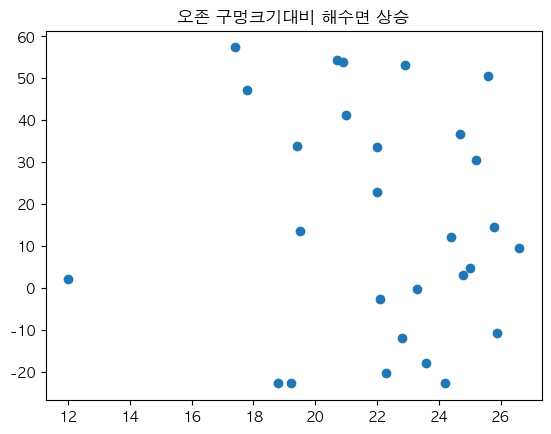

In [139]:
plt.scatter(data['Hole Area'],data['sealevel'])
plt.title('오존 구멍크기대비 해수면 상승')
plt.show()

In [147]:
data3 = data2.drop(data2[['남극 해빙면적 평균(10^6km)','Hole Area','Minimum Ozone','Cluster']],axis=1)

In [150]:
data3.to_csv('../file/data_ver3.csv',index=False)

In [152]:
data3

,Year,sealevel,co2,Population,Thickness,북극 해빙면적 평균(10^6km)
0,1990,-22.847396,22849.92,5.28,2.035898,9.668333
1,1991,-22.814062,23056.40,5.37,2.025763,9.742500
2,1992,-20.247396,22988.29,5.45,2.024229,10.099167
3,1993,-22.780729,23124.00,5.54,1.934320,9.810000
4,1994,-17.980729,23260.29,5.62,1.974827,9.989167
5,1996,-11.947396,24214.92,5.79,1.896918,9.799167
6,1997,-2.647396,25292.92,5.87,1.935293,9.616667
7,1998,-10.814063,24895.32,5.95,1.830868,9.626667
8,1999,-0.247396,24957.30,6.03,1.770938,9.693333
9,2000,2.952604,25637.87,6.11,1.750909,9.457500
